#  Pre-processing step

positive class: default

Negative class: to pay (not default)

## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf 

import graphviz as gp

import itertools

## Import data 

In [ ]:
df_credit = pd.read_csv("Credit_data.csv")
df_application = pd.read_csv("New_applicantions.csv")

## Cleansing the data

Use the function `.isna()` and conditioning to detect if there are any empty cells. The result indicates that there is no missing value in our dataset. 

In [ ]:
df_credit.isna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_application.loc[:,:'PAY_AMT6'].isna() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Use the function `.duplicated()` and conditioning to detect if there are any duplicate cells. The result indicates that there is no duplicate value in our dataset. 

In [ ]:
dupe = df_credit.duplicated()
print(dupe.any())
print(df_credit[dupe])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default_0]
Index: []

[0 rows x 25 columns]


In [ ]:
dupe = df_application.duplicated()
print(dupe.any())
print(df_application[dupe])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, Unnamed: 24]
Index: []

[0 rows x 25 columns]


## Feature engineering 

Create the labels `Y` from `df_credit`, which is the column `default_0`

In [ ]:
Y = df_credit['default_0']

The column `ID` consists randomly generated ID values by the lending institutions so it does not have predictive value our model. Hence, we remove this column from the data set. Also, we will drop the `default_0` from X value because it is the Y value.

In [ ]:
df = df_credit.drop(['ID','default_0'], axis = 1)

We group `EDUCATION` and `MARRIAGE` to get the encoded variables for each group in order to allow the representation of categorical data to be more expressive, since these are categorical values. Also, changing the values for `SEX` into 0 and 1 to make it compatible to others variablles.

In [ ]:
# Converted data for EDUCATION
df['EDU_GRADUATE'] = np.where((df['EDUCATION']==1),1,0)
df['EDU_UNDERGRADUATE'] = np.where((df['EDUCATION']==2),1,0)
df['EDU_HIGH-SCHOOL'] = np.where((df['EDUCATION']==3),1,0)
df['EDU_OTHER'] = np.where((df['EDUCATION']==4),1,0)
df['EDU_UNKNOWN'] = np.where(((df['EDUCATION']==0) | (df['EDUCATION']==5) | (df['EDUCATION']==6)),1,0)
df.drop('EDUCATION', axis = 1, inplace = True)

# Converted data for MARRIAGE
df['MAR_MARRIED'] = np.where((df['MARRIAGE']==1),1,0)
df['MAR_SINGLE'] = np.where((df['MARRIAGE']==2),1,0)
df['MAR_OTHER'] = np.where((df['MARRIAGE']==3),1,0)
df['MAR_UNKNOWN'] = np.where((df['MARRIAGE']==0) ,1,0)
df.drop('MARRIAGE', axis = 1, inplace = True)

# Converted data for SEX
df['GENDER'] = np.where((df['SEX']==2),1,0)
df.drop('SEX', axis = 1, inplace = True)

Since in this context, we care more about the defaulters, we will group all the pay customers with repayment status of `-2`,`-1` and `0`, and change it value into `0` as a pay customer classification. All the others values from `1` toward, which indicate the level of delay payment, would be kept the same.

In [ ]:
df['PAY_1'].replace({-2:0, -1:0 }, inplace = True)
df['PAY_2'].replace({-2:0, -1:0 }, inplace = True)
df['PAY_3'].replace({-2:0, -1:0 }, inplace = True)
df['PAY_4'].replace({-2:0, -1:0 }, inplace = True)
df['PAY_5'].replace({-2:0, -1:0 }, inplace = True)
df['PAY_6'].replace({-2:0, -1:0 }, inplace = True)

In [ ]:
#Assign this dataframe for X, and see what it looks like 
X = df
X.head() 

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_GRADUATE,EDU_UNDERGRADUATE,EDU_HIGH-SCHOOL,EDU_OTHER,EDU_UNKNOWN,MAR_MARRIED,MAR_SINGLE,MAR_OTHER,MAR_UNKNOWN,GENDER
0,20000,24,2,2,0,0,0,0,3913.0,3102.0,...,0,1,0,0,0,1,0,0,0,1
1,90000,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,1,0,0,1
2,50000,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,1,0,0,0,1
3,50000,57,0,0,0,0,0,0,8617.0,5670.0,...,0,1,0,0,0,1,0,0,0,0
4,50000,37,0,0,0,0,0,0,64400.0,57069.0,...,1,0,0,0,0,0,1,0,0,0


We do the same for the `df_application`

In [ ]:
#drop ID and Unnamed value 
df1 = df_application.drop(['ID','Unnamed: 24'],axis=1)

# Converted data for EDUCATION
df1['EDU_GRADUATE'] = np.where((df1['EDUCATION']==1),1,0)
df1['EDU_UNDERGRADUATE'] = np.where((df1['EDUCATION']==2),1,0)
df1['EDU_HIGH-SCHOOL'] = np.where((df1['EDUCATION']==3),1,0)
df1['EDU_OTHER'] = np.where((df1['EDUCATION']==4),1,0)
df1['EDU_UNKNOWN'] = np.where(((df1['EDUCATION']==0) | (df1['EDUCATION']==5) | (df1['EDUCATION']==6)),1,0)
df1.drop('EDUCATION', axis = 1, inplace = True)

# Converted data for MARRIAGE
df1['MAR_MARRIED'] = np.where((df1['MARRIAGE']==1),1,0)
df1['MAR_SINGLE'] = np.where((df1['MARRIAGE']==2),1,0)
df1['MAR_OTHER'] = np.where((df1['MARRIAGE']==3),1,0)
df1['MAR_UNKNOWN'] = np.where((df1['MARRIAGE']==0) ,1,0)
df1.drop('MARRIAGE', axis = 1, inplace = True)

# Converted data for SEX
df1['GENDER'] = np.where((df1['SEX']==2),1,0)
df1.drop('SEX', axis = 1, inplace = True)

# change repayment status 
df1['PAY_1'].replace({-2:0, -1:0 }, inplace = True)
df1['PAY_2'].replace({-2:0, -1:0 }, inplace = True)
df1['PAY_3'].replace({-2:0, -1:0 }, inplace = True)
df1['PAY_4'].replace({-2:0, -1:0 }, inplace = True)
df1['PAY_5'].replace({-2:0, -1:0 }, inplace = True)
df1['PAY_6'].replace({-2:0, -1:0 }, inplace = True)

In [ ]:
#Assign this dataframe for X, and see what it looks like 
X_2 = df1
X_2.head() 

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_GRADUATE,EDU_UNDERGRADUATE,EDU_HIGH-SCHOOL,EDU_OTHER,EDU_UNKNOWN,MAR_MARRIED,MAR_SINGLE,MAR_OTHER,MAR_UNKNOWN,GENDER
0,500000,29,0,0,0,0,0,0,367965,412023,...,1,0,0,0,0,0,1,0,0,0
1,210000,29,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,150000,27,0,0,0,0,0,0,86009,86108,...,1,0,0,0,0,0,1,0,0,0
3,20000,38,0,0,0,0,0,0,17973,19367,...,0,1,0,0,0,1,0,0,0,0
4,400000,34,0,0,0,0,0,0,19660,9666,...,0,1,0,0,0,1,0,0,0,0


## Exploring the data

Let's see the distribution of our `default_0` value

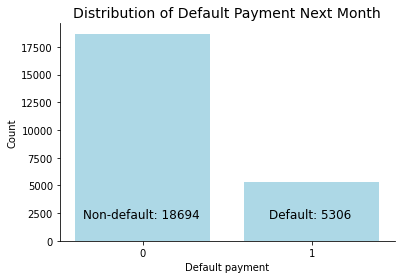

In [ ]:
values = Y
val,count = np.unique(values, return_counts=True)

fig, ax = plt.subplots()
ax.bar(x=range(len(val)), height=count, color = 'lightblue')

ax.annotate(f'Non-default: {count[0]}', xy=(-0.3, 15000), xytext=(-0.35, 2000), size=12)
ax.annotate(f'Default: {count[1]}', xy=(0.75, 15000), xytext=(0.75, 2000), size=12)
ax.set_ylabel('Count')
ax.set_xlabel('Default payment')
ax.set_title('Distribution of Default Payment Next Month', size=14)
ax.set_xticks(range(len(val)))
ax.set_xticklabels(val)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

As we can see, our data is highly imbalanced. Moreover, we need to pay more attention on the minority class, which predict the defaulters (Y=1). The reasons why saying so will be clarified later.

## Split data

It is very important that our final model be measured and reported on the performance of the models on data that is completely unused during the analysis, known as “out of sample” or data. experiment. The idea is that in practice, we want our models to be used to predict data that we haven't seen yet. This is why we split the data into 3 groups (train data, validation data and test data) using some kind of random separation technique. The test sample will mimic the future data, and performance on this sample set is a better approximation of the performance one would expect in practice from the chosen classification method. The train data and the validation data are used to justify the model, while the test data is only used once at the very end before making final business decisions based on the analysis. 

We split the data into training/validation/testing with percentages 60/20/20, using `train_test_split`.

In [ ]:
train_X, otherX, trainY, otherY = train_test_split(X, Y, test_size=0.4,random_state = 726)

In [ ]:
test_X, validation_X, testY, validationY = train_test_split(otherX, otherY, test_size=0.5,random_state = 1592)

Now, let's check whether  same proportion of data from each class (customers who default versus not) are maintained in each sample.

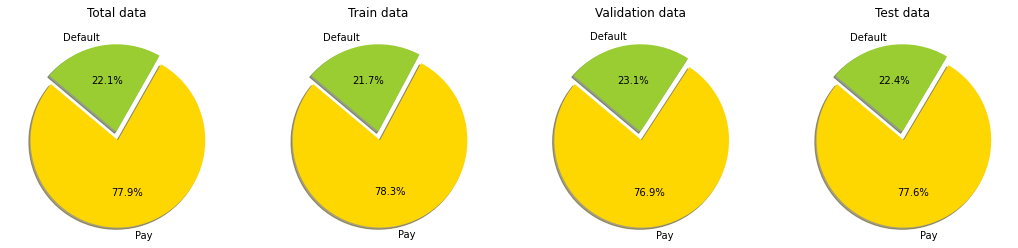

In [ ]:
# set figsize
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# set labels, colors and explode part
labels = ['Pay', 'Default']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)

# %plot total data
# find number of pay and default
pay_Y = len([i for i in Y if i == 0]) 
default_Y = len([i for i in Y if i == 1]) 

# Plot
ax1.pie([pay_Y,default_Y], 
        explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Total data')

# %plot train data
# find number of pay and default
pay_trainY = len([i for i in trainY if i == 0]) 
default_trainY = len([i for i in trainY if i == 1]) 

# Plot
ax2.pie([pay_trainY,default_trainY], 
        explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Train data')

# %plot validation data
# find number of pay and default
pay_validationY = len([i for i in validationY if i == 0]) 
default_validationY = len([i for i in validationY if i == 1]) 

# Plot
ax3.pie([pay_validationY,default_validationY], 
        explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax3.set_title('Validation data')

# %plot validation data
# find number of pay and default
pay_testY = len([i for i in testY if i == 0]) 
default_testY = len([i for i in testY if i == 1]) 

# Plot
ax4.pie([pay_testY,default_testY], 
        explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('Test data')

plt.show()


We can see that we are successfully maintain the same balance of the dependent variable categories as in the overall dataset. Therefore, we are accurately classified the data set.

## Normalize data

We aim to set all variables for the same scale. The reasons for doing so is that, for example, the values for limit balance varies from thousands or the age values may goes from 20 to 80, which have very different in scale.

As we know that, test dataset should be the whole new data, which is not affacted by the train and validation data to avoid bias, as a result, we will normalize the data after splitting them. MinMaxScaler of the predictor variables is a technique used to center and normalise the data by min and max values of the dataset. If we take the min and max values of the whole dataset, we will be introducing future information into the training explanatory variables

In [ ]:
def rescale_data(df, train_X, validation_X, test_X, df1, X_2):
    scaler = MinMaxScaler()
    
    trainX = pd.DataFrame(scaler.fit_transform(train_X), columns = df.columns)
    validationX = pd.DataFrame(scaler.transform(validation_X), columns = df.columns)
    testX = pd.DataFrame(scaler.transform(test_X), columns = df.columns)
    X2 = pd.DataFrame(scaler.fit_transform(X_2), columns = df1.columns)

    return trainX, validationX, testX, X2

In [ ]:
# Rescale data for credit dataset 
trainX, validationX, testX, X2 = rescale_data(df, train_X, validation_X, test_X, df1, X_2) 

Let's see some line of data after the rescale 

In [ ]:
#data of credit data
trainX.head() 

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_GRADUATE,EDU_UNDERGRADUATE,EDU_HIGH-SCHOOL,EDU_OTHER,EDU_UNKNOWN,MAR_MARRIED,MAR_SINGLE,MAR_OTHER,MAR_UNKNOWN,GENDER
0,0.164557,0.189655,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024026,0.089599,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.088608,0.344828,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.075358,0.088000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.012658,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045068,0.109937,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.202532,0.189655,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.028876,0.089433,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.088608,0.275862,0.0,0.0,0.0,0.285714,0.285714,0.285714,0.057681,0.122453,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# data of new application
X2.head() 

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_GRADUATE,EDU_UNDERGRADUATE,EDU_HIGH-SCHOOL,EDU_OTHER,EDU_UNKNOWN,MAR_MARRIED,MAR_SINGLE,MAR_OTHER,MAR_UNKNOWN,GENDER
0,0.700000,0.148148,0.0,0.0,0.0,0.0,0.0,0.0,0.734788,0.808153,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.285714,0.148148,0.0,0.0,0.0,0.0,0.0,0.0,0.003972,0.005232,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.200000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.174795,0.173033,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.014286,0.314815,0.0,0.0,0.0,0.0,0.0,0.0,0.039668,0.042973,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.557143,0.240741,0.0,0.0,0.0,0.0,0.0,0.0,0.043019,0.024069,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Building model 

## Model chosen 

Since credit default risk prediction is itself a binary classification problem, theoretically to say any machine learning method that can be used in binary classification problems can be usable. Here, we will focus on comparing two main algorithms: logistic regression and decision trees. We will use our training set to fit the models, and then use our validation set to compare the ROC_curve between 2 models.

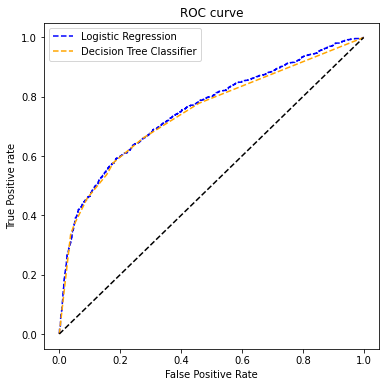

In [ ]:
# logistic regression
logm = LogisticRegression(max_iter=1000)
#Decision Tree Classifier
treem = DecisionTreeClassifier(max_leaf_nodes = 8)

# fit model
logm.fit(trainX, trainY)
treem.fit(trainX, trainY)

# predict probabilities
pred_prob1 = logm.predict_proba(validationX)[:,1]
pred_prob2 = treem.predict_proba(validationX)[:,1]

# threshold
fpr1, tpr1, thresholds1 = metrics.roc_curve(validationY,pred_prob1) 
fpr2, tpr2, thresholds2 = metrics.roc_curve(validationY,pred_prob2) 

fig = plt.figure(figsize=(6,6)) 
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Decision Tree Classifier')
# plot random guess curve
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Set up label and title
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

As we can see in the chart, Logistic Regression model (logm) has better ROC_curve. Therefore, we will stick with Logistic Regression model (logm) for our future analysis.

We will see some information about our Logistic regression model as below:

In [ ]:
print("Intercept = ",logm.intercept_) # Print the resultant model intercept 
print("Model coefficients = ", logm.coef_) # Print the resultant model coefficients (in order of variables in X)
print("R^2 =",logm.score(X,Y)) # Print the resultant model R-squared

Intercept =  [-2.20074031]
Model coefficients =  [[-1.25043928e+00  2.57351419e-01  6.61166148e+00  4.12063622e-01
   1.00013009e+00  3.60623020e-01  6.07730862e-01  1.46450340e+00
  -2.22207767e-02  1.52697476e-01  2.20958484e-01  3.20546987e-03
  -1.63236087e-01  1.76245996e-01 -2.28460310e+00 -1.26884098e+00
  -8.24458730e-01 -1.74812887e+00 -1.78226262e+00 -1.05818204e+00
   4.10480473e-01  4.44905562e-01  3.92047169e-01 -4.10243372e-01
  -8.47176374e-01  2.29446265e-01  9.47651180e-02  1.26750858e-01
  -4.60948783e-01 -1.32870344e-01]]
R^2 = 0.7789166666666667


According to the information of R^2 equal to 0.7789, 77.89% of our targeted values can be explained by the model's inputs. This results quite good for our fitted model.

## Set of threshold

To calculate threshold for the model, we use `predict_proba` to predict the probability of customes to belong into the default class, and use `metrics.roc_curve()` to find the False positive rate, True Positive rate and Thresholds.

In [ ]:
y_pred_prob = logm.predict_proba(validationX)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(validationY,y_pred_prob) 

In this context, we will find the best threshold base on the assumption that we need to maximize our profit for the bank

For each threshold, we will have different confusion matrix which lead to different profit. In order to find the maximum profit, we compute the profit for each threshold and then compare them.

Calculating the expected profit requires we have an estimate of the four costs/values: 
1. True negative: we market to this group, and it would in fact they are not default. The net-profit then is £1500
2. False negative: we market to this group, even though they would be default. We loss £5000 (or the net-profit for such a group is -£5000)
3. False positive: we assume the group would be default, so we don't issue credit. The net-profit here is £0
4. True positive: we correcly assume that the group is default, and we don't issue credit. The net-profit here is £0

In [ ]:
profit_ls = []

for thres in thresholds:
    y_validation_pred = np.where(y_pred_prob > thres, 1, 0)
    cm = metrics.confusion_matrix(validationY,y_validation_pred)
    profit = cm[0][0] * 1500 + cm[1][0] * (-5000) + cm[0][1] * 0 + cm[1][1] * 0
    
    profit_ls.append(profit)

In [ ]:
profit_pd = pd.concat([pd.Series(fpr),pd.Series(tpr),pd.Series(thresholds), pd.Series(profit_ls)] , axis=1)
profit_pd.columns = ['fpr','tpr','thresholds','profit']
profit_pd.sort_values(by='profit', ascending = False, inplace = True)
profit_pd

,fpr,tpr,thresholds,profit
556,0.186891,0.591155,0.200600,2239500
557,0.186891,0.592058,0.200500,2238000
555,0.186078,0.591155,0.201107,2237500
558,0.188245,0.592058,0.199987,2237000
559,0.188245,0.592960,0.199974,2235500
...,...,...,...,...
1326,0.998375,0.999097,0.028783,5500
1327,0.998375,1.000000,0.027089,4000
1328,1.000000,1.000000,0.002745,1500
1,0.000000,0.000903,0.998800,-2000


Given the values and costs of correct classifications and misclassifications, we can now generate the so called profit curve

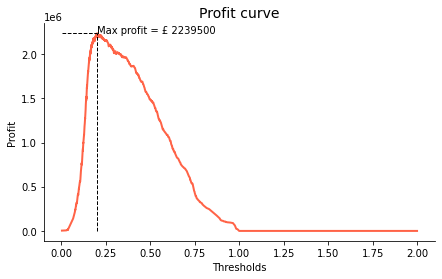

In [ ]:
#data
y = profit_ls
x = thresholds

# Setting figure
plt.figure(figsize=(7,4))

#Plot 
plt.plot(x, y, color='tomato', lw=2)

#Plot maximum profit point to emphasize, add reference lines and textbox
profit_i = profit_pd.reset_index(drop=True).loc[0]['profit']
thres_i = profit_pd.reset_index(drop=True).loc[0]['thresholds']
# vertical reference line
plt.plot([thres_i, thres_i], [np.min(profit), profit_i], 
         color='black', ls='--', lw='1')
# horizontal reference line
plt.plot([np.min(thresholds), thres_i], [profit_i, profit_i], 
         color='black', ls='--', lw='1')
# textbox within the point
textstr = (f'Max profit = £ {int(profit_i)}')
fpr_range = np.max(profit) - np.min(profit)
tpr_range = np.max(thresholds) - np.min(thresholds)
plt.text(thres_i, profit_i, textstr,
         horizontalalignment='left', verticalalignment='baseline')

#set up label 
plt.xlabel('Thresholds')
plt.ylabel('Profit')
plt.title('Profit curve', size=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Let's print out the maximum profit that we can achive from the validation data 

In [ ]:
max_profit = profit_pd.reset_index(drop=True).loc[0]['profit']
best_thresholds = profit_pd.reset_index(drop=True).loc[0]['thresholds']

print(f"Maximum profit is £{max_profit} for the threshold of {best_thresholds}")
print(f"At this threshold point: \n\tThe False Positive rate is {profit_pd.reset_index(drop=True).loc[0]['fpr']} \n\tThe True positive rate is {profit_pd.reset_index(drop=True).loc[0]['tpr']}")


Maximum profit is £2239500.0 for the threshold of 0.20060044679326708
At this threshold point: 
	The False Positive rate is 0.18689057421451788 
	The True positive rate is 0.5911552346570397


## Performance Metrics For Classification 

To understanding whether our model is predicting well or not, we will consider some performace metrics below

### ROC_curve

At this stage, consider the ROC_AUC_SCORE can help us know how well our model separates the different classes in the validation data.

In [ ]:
auc = metrics.roc_auc_score(validationY,y_pred_prob)
print(f'The ROC_AUC_SCORE is {auc}')

The ROC_AUC_SCORE is 0.7550251348412608


Plotting the ROC curve with the threshold we find above for better visualization 

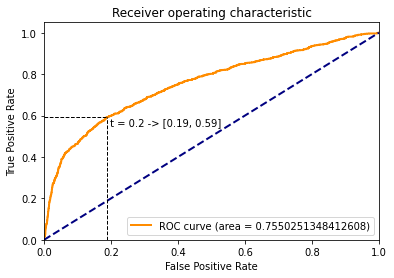

In [ ]:
# Setting figure
plt.figure()

#Plot ROC_curve
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (area = {auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#Plot above threshol point to emphasize, add reference lines and textbox
fpr_i = profit_pd.reset_index(drop=True).loc[0]['fpr']
tpr_i = profit_pd.reset_index(drop=True).loc[0]['tpr']
best_thresholds_i = best_thresholds
# vertical reference line
plt.plot([fpr_i, fpr_i], [np.min(tpr), tpr_i], color='black',
         ls='--',
         lw='1')
# horizontal reference line
plt.plot([np.min(fpr), fpr_i], [tpr_i, tpr_i], color='black',
         ls='--',
         lw='1')
# textbox within the point
textstr = (f' t = {round(best_thresholds_i,2)} -> [{round(fpr_i,2)}, {round(tpr_i,2)}]')
fpr_range = np.max(fpr) - np.min(fpr)
tpr_range = np.max(tpr) - np.min(tpr)
plt.text(fpr_i, tpr_i, textstr,
         horizontalalignment='left', verticalalignment='top')

#set up label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

The AUC score calculates the area between the orange curved line and navy dotted line. This area is a number between 0 and 1, zero meaning the model predicted all of the data incorrectly, and one meaning the model predicted all of the data correctly. Our model is pretty good at 0.75, which indicate that the quality of our model is fair enough. Also, the most optimal model will have threshold values in the upper left corner of the curve, representing a very low False Negatives and very low False Positives.

### Confusion matrix 

In this case, false positives (FP) here are the number of clients that we predict they will default but infact they will pay. False negatives (FN) are the number of clients we predict that they will pay but they actually defaulters. If a defaulter was predicted as a pay person, we will issue credit for him and then loss £5000 as this is a default customer. If we predict that a customer will be default while infact he is not, we just have the loss of 0.

Overall, better to lose a person who pay rather than granted credit for a person who actually a defaulter. Therefore: <span class="mark">better to have small FN and large FP.</span>

A confusion matrix will able to evaluate and specified how each class is classified, which class is most correctly classified, and which class data is often misclassified into another. We can obtain the matrĩ by using `confusion_matrix` command.

In [ ]:
# Predict the probability of Y base on our best threshold 
Y_valid_pred = np.where(y_pred_prob > best_thresholds, 1, 0) 

# Find the confusion matrix
cm = metrics.confusion_matrix(validationY,Y_valid_pred)

#Print out the confusion matrix in the context of pay - default 
df_cm = pd.DataFrame(data=cm, index = ['pay', 'default'], columns = ['pay', 'default'])
df_cm.index.name = 'TRUE'
df_cm.columns.name = 'PREDICTION'
print(f'Confusion matrix for the threshold of {best_thresholds}') 
df_cm

Confusion matrix for the threshold of 0.20060044679326708


PREDICTION,pay,default
TRUE,,
pay,3003,689
default,453,655


We can now verify the false and true positive rates:

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("The False Postive rate is " + str(1-TN/(FP+TN)))
print("and the True positive rate is " + str(TP/(TP+FN)))

The False Postive rate is 0.18661971830985913
and the True positive rate is 0.5911552346570397


For a clearer view, a normalized confusion matrix brings more information rather than the unnormalized one. To get the normalized confusion matrix, we take each row of the unnormalized confusion matrix to be divided by the sum of the elements on that row. Thus, we have remarked that the sum of the elements on a row of the normalized confusion matrix is always equal to 1 . To easily visualized the it, we will plot both unnormalized and normalized confusion matrix into the heatmap.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    sns.set_style('white')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.tick_params(labeltop=True, labelbottom=False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label') 
    #plt.XAxis.set_label_position('top')
    plt.xlabel('Predicted label', loc = 'center')

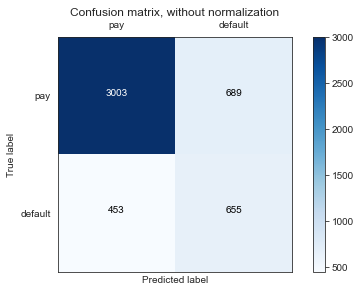

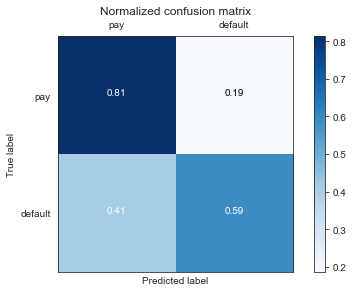

In [ ]:
# Plot non-normalized confusion matrix
class_names = ['pay', 'default']
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.grid(False)

plt.show()

A good confusion matrix should have large diagonal values and small off-diagonal ones. As we can see in the normalized confusion matrix, our prediction is quite good when most of the payable and default customers were categorized correctly. 

Moreover, as mentioned above, the number we want to minimize is in the bottom-left quadrant. This number represents those customers we predicted would pay, but they in fact default. We need this number to be as small as possible. Inded, our model doing a quite great job when small number of actual defaulters was predicted incorrectly. 

### Accuracy score

Again, check the accuracy score for the threshold that we have set to see the proportion of the total number of predictions that are correct 

In [ ]:
accurate = accuracy_score(validationY, Y_valid_pred)
print(f'Accuracy score for validation data is {accurate}')

Accuracy score for validation data is 0.7620833333333333


The result for the accuracy score shows that our model have done a good job on predicting the Y values validation dataset. For our model, we have got 0.76 which means our model is approximately 76% accurate.

## Retrain model 

Retraining the final model with training+validation, then test it on test data. 

In [ ]:
trainX_final=pd.concat([pd.DataFrame(trainX), pd.DataFrame(validationX)], axis = 0)
trainY_final=pd.concat([pd.DataFrame(trainY), pd.DataFrame(validationY)], axis = 0)

We now retrain our model on `trainX_final` and `trainY_final` with threshold that we have found above using scikit learn

In [ ]:
model = LogisticRegression(max_iter=15000).fit(trainX_final, trainY_final.values.ravel()) 

We now can predict Y values for test dataset.

In [ ]:
Y_pre = model.predict_proba(testX)[:,1]
best_th = best_thresholds
Y_test_pred = np.where(Y_pre > best_th, 1, 0) 

Then, let's compute the ROC_AUC_score for this retrain model and before retrain model, then compare them to see how well it predict our target variable in this test data.

In [ ]:
#Compute score
auc2 = metrics.roc_auc_score(testY,Y_pre)

#Print all the score
print(f'The ROC_AUC_SCORE after retrain model is {auc2}')
print(f'The ROC_AUC_SCORE before retrain model is {auc}')

The ROC_AUC_SCORE after retrain model is 0.7530285568541641
The ROC_AUC_SCORE before retrain model is 0.7550251348412608


The ROC generated by the model using validation and training data are relatively high (>0.7), which are slightly lower, however, present no significantly different from the model using only training data. This could be explained by adding more data, the generalisation of the model has been improved. 

Also, let's see the confusion matrix for this test dataset to see whether our proportion for the defaulters to be predicted as a payer is high or not.

In [ ]:
# Find the confusion matrix
cm2 = metrics.confusion_matrix(testY,Y_test_pred)

#Print out the confusion matrix in the context of pay - default 
df_cm2 = pd.DataFrame(data=cm2, index = ['pay', 'default'], columns = ['pay', 'default'])
df_cm2.index.name = 'TRUE'
df_cm2.columns.name = 'PREDICTION'
print(f'Confusion matrix for the threshold of {best_thresholds}') 
df_cm2

Confusion matrix for the threshold of 0.20060044679326708


PREDICTION,pay,default
TRUE,,
pay,3017,707
default,432,644


Check for Specificity, Sensitivity, Accusacy and Misclassification:

In [ ]:
# Calculation of True Negative, False Positive, False Negative and True Positive
TN2 = cm2[0][0]
FP2 = cm2[0][1]
FN2 = cm2[1][0]
TP2 = cm2[1][1]


# Model before retrain:
Specificity1 = TN/(FP+TN)
Sensitivity1 = TP/(TP+FN)
Accuracy1 = (TP+TN)/(TP+FN+TN+FP)
Misclassification1 = (FP+FN)/(TP+FN+TN+FP)

# Model after retrain
Specificity2 = TN2/(FP2+TN2)
Sensitivity2 = TP2/(TP2+FN2)
Accuracy2 = (TP2+TN2)/(TP2+FN2+TN2+FP2)
Misclassification2 = (FP2+FN2)/(TP2+FN2+TN2+FP2)

# Combine into a dataframe 
score_1 = [Specificity1, Sensitivity1, Accuracy1, Misclassification1 ]
score_2 = [Specificity2, Sensitivity2, Accuracy2, Misclassification2 ]
score_pd = pd.concat([pd.Series(score_1), pd.Series(score_2)], axis = 1 )
score_df = score_pd.rename(columns = {0:'before',1:'after'}
                           , index = {0:'Specificity', 1:'Sensitivity', 2:'Accuracy', 3:'Misclassification'})
score_df 

,before,after
Specificity,0.813380,0.810150
Sensitivity,0.591155,0.598513
Accuracy,0.762083,0.762708
Misclassification,0.237917,0.237292


Overall, our retrained model is better then our previous model. As we can see from the table above, the specificity has only a minor decrease. For Sensitivity, it has increased. However, as we said before, we will pay more attention in reduce the number of real defaulters being predicted as a payer, therefore, the higher sensitivity, the better for our model. Additionally, the accuracy of retrained model also increased, which shows that our retrained model has better performance than the previous one. Moreover, the misclassification has slightly decreased, which is a good sign that total number of false predictions has also reduces.

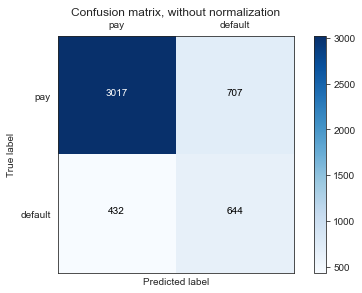

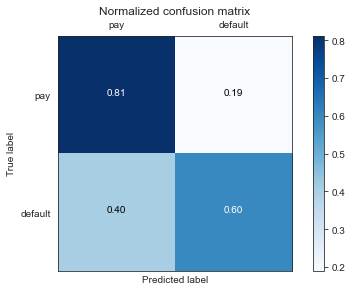

In [ ]:
class_names = ['pay', 'default']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm2, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.grid(False)

plt.show()

The results for confussion matrix was quite similar with the result before retraned model, which even better for the proportion of false negative. The values for the proportion of real defaulters to be predicted as the payers has decreased in this retrained model. Hence, we will use this retrain model for the prediction of our new dataset.

# Decision

Determine which of the 1,000 clients in the pilot should be issued credit. Once done,
create a spreadsheet with only one column, A1:A1000, of 0s and 1s, representing your
recommendation for issuing credit to each of 1 000 pilot customers in the order of their
IDs as per the data (1 – issue credit, 0 – do not issue).

Using the above model, we now can predict the new customers and then decide whether they are default or nor.

In [ ]:
# Predict whether the customer is default or not
Y2_pre = model.predict_proba(X2)[:,1]
best_th = best_thresholds
Y2 = np.where(Y2_pre > best_th, 1, 0)
Y2

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Now, in the decision to issue the credit for those or not, we know that if Y2 equal 0 it means that this person will not be default, therefore we want to issue credit for he/she, and vice versa.

We now create a spreadsheet with only one column, A1:A1000, of 0s and 1s, representing
recommendation for issuing credit to each of 1000 pilot customers in the order of their
IDs as per the data (1 – issue credit, 0 – do not issue).

In [ ]:
# The decision of issue
issue_credit = np.where(Y2 == 0, 1, 0)
issue_credit

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Save the spreadsheet and deliver our decision to  department.

In [ ]:
df_issue_credit = pd.DataFrame(issue_credit)
df_issue_credit.columns = ['Issue credit']
df_issue_credit.to_csv('Issue_credit_decision.csv', index=False)  